# Generación de mapas de EVI para el embalse de Valdecañas

Recorremos el directorio con los productos de las Landsat , y creamos tres listas para las escenas pre, port y durante la construcción del PIR

In [1]:
import os
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt

rutapro = r'X:\Proyectos\marina_valdecanas\capas\teledeteccion\Landsat\pro'
rutasave = r'E:\VDCNS\EVIs'

evisPres = []
evisDur = []
evisPost = []

In [90]:
for i in os.listdir(rutapro):
    if os.path.isdir(os.path.join(rutapro, i)):
        if int(i[:6]) < 200707:
            escena = os.path.join(rutapro, i)
            for f in os.listdir(escena):
                if f.endswith('_evi_reclass.img'):
                    evisPres.append(os.path.join(escena, f))
        elif int(i[:6]) > 201107:
            escena = os.path.join(rutapro, i)
            for f in os.listdir(escena):
                if f.endswith('_evi_reclass.img'):
                    evisPost.append(os.path.join(escena, f))
        else:
            escena = os.path.join(rutapro, i)
            for f in os.listdir(escena):
                if f.endswith('_evi_reclass.img'):
                    evisDur.append(os.path.join(escena, f))
        

In [ ]:
print('Número de escenas previas:', len(evisPres), '; Número de escenas durante:', 
      len(evisDur), '; Número de escenas posteriores:', len(evisPost))

## Metodología

Para hacer los cálculos se ha realizado primero una máscara, quedándonos sólo con los valores del EVI dentro de la superficie inundada del embalse. El motivo es que los valores del EVI en las orillas (pastizales) suelen ser bastante altos, ya la hora de extraer las estadísticas para toda la serie temporal, podría dar lugar a errores al aporar valores muy altos a esos pixeles. La zona no inundada se ha clasificado como NoData (valor 0)

In [3]:

bloom = r'X:\Proyectos\marina_valdecanas\capas\teledeteccion\Landsat\pro\20161004l8oli202_32\20161004l8oli202_32_evi_reclass.img'
nobloom = r'X:\Proyectos\marina_valdecanas\capas\teledeteccion\Landsat\pro\20160223l8oli202_32\20160223l8oli202_32_evi_reclass.img'

with rasterio.open(bloom) as src:
    BLOOM = src.read()
    
with rasterio.open(nobloom) as src2:
    NOBLOOM = src2.read()

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
plot.show(BLOOM, ax=ax1, title='Bloom. Fecha: 2016/10/04. Cota: 300.11')
plot.show(NOBLOOM, ax=ax2, title='NoBloom. Fecha: 2016/02/23. Cota: 308.41');
#fig.tight_layout()
#plot.show(NOBLOOM, cmap='PiYG', title='2016/10/04');

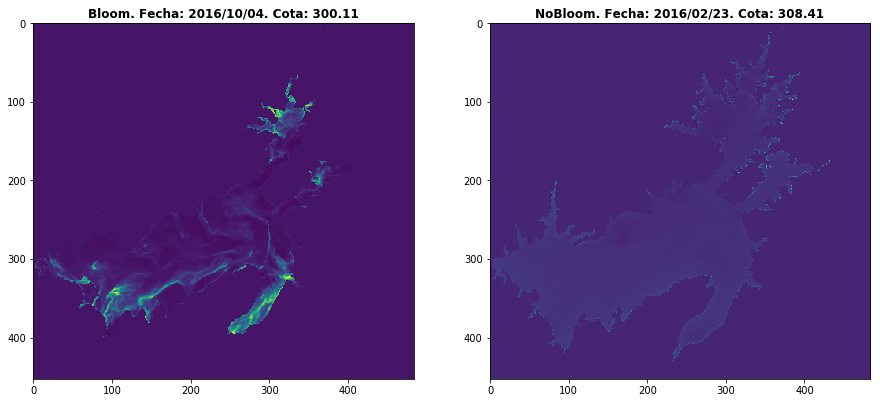

In [89]:
plot.show(NOBLOOM, BLOOM);

Ahora hacemos el stack con todos los EVIS para cada uno de los periodos

In [93]:
#Esto se hace para cad no de los periodos

outfile = os.path.join(rutasave, 'evisPost')

# Read metadata of first file
with rasterio.open(evisPost[0]) as src0:
    meta = src0.meta

# Update meta to reflect the number of layers
meta.update(count = len(evisPost))

# Read each layer and write it to stack
with rasterio.open(outfile, 'w', **meta) as dst:
    for id, layer in enumerate(evisPost):
        with rasterio.open(layer) as src1:
            dst.write_band(id + 1, src1.read(1))

Una vez que tenemos los stacks obtenemos la mediana de cada pixel para el periodo

In [108]:
EVIPre = rasterio.open(r'E:\VDCNS\EVIs\evisPres').read()
EVIDur = rasterio.open(r'E:\VDCNS\EVIs\evisDur').read()
EVIPost = rasterio.open(r'E:\VDCNS\EVIs\evisPost').read()

In [100]:
eviPre.shape

(52, 453, 484)

In [124]:
import numpy as np

#MEDIAN
EVIPREMEDIAN = np.median(EVIPre, axis=0)
EVIPREMEDIAN.shape

EVIDURMEDIAN = np.median(EVIDur, axis=0)
EVIDURMEDIAN.shape

EVIPOSTMEDIAN = np.median(EVIPost, axis=0)
EVIPOSTMEDIAN.shape

#MAX
EVIPREMAX = np.max(EVIPre, axis=0)
EVIPREMAX.shape

EVIDURMAX = np.max(EVIDur, axis=0)
EVIDURMAX.shape

EVIPOSTMAX = np.max(EVIPost, axis=0)
EVIPOSTMAX.shape

#MEAN
EVIPREMEAN = np.mean(EVIPre, axis=0)
EVIPREMEAN.shape

EVIDURMEAN = np.mean(EVIDur, axis=0)
EVIDURMEAN.shape

EVIPOSTMEAN = np.mean(EVIPost, axis=0)
EVIPOSTMEAN.shape

(453, 484)

In [128]:
outfile = os.path.join(rutasave, 'eviDur_mean')

# Read metadata of first file
with rasterio.open(evisDur[0]) as src0:
    print(src0.shape)
    meta = src0.meta

# Read each layer and write it to stack
with rasterio.open(outfile, 'w', **meta) as dst:
    dst.write_band(1, EVIDURMEAN)

(453, 484)
